# Pytorch實作: 透過LSTM進行股價預測實例操作


yfinance套件安裝<br>
https://pypi.org/project/yfinance/<br>

python第三方套件yfinance上可以串接 Yahoo Finance API 下載股票的價量資訊。<br>

所以我們安裝yfinance套件來協助我們擷取股價來做後續LSTM的應用操作介紹。<br>

透過yfinance套件擷取的資料就是 Pandas 的 DataFrame, 不論是要做資料分析還是繪圖都能馬上套用。<br>



In [1]:
!pip install yfinance -q


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# 讀入series # 台灣積體電路製造
df = yf.Ticker("2330.TW")
df.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-05 00:00:00+08:00,578.0,580.0,574.0,576.0,18158971,0.0,0.0
2024-01-08 00:00:00+08:00,582.0,585.0,579.0,583.0,17761275,0.0,0.0
2024-01-09 00:00:00+08:00,588.0,589.0,583.0,586.0,22501510,0.0,0.0
2024-01-10 00:00:00+08:00,581.0,586.0,580.0,584.0,13037716,0.0,0.0
2024-01-11 00:00:00+08:00,586.0,589.0,583.0,586.0,23997409,0.0,0.0
2024-01-12 00:00:00+08:00,581.0,588.0,581.0,584.0,16496053,0.0,0.0
2024-01-15 00:00:00+08:00,590.0,590.0,585.0,586.0,21143076,0.0,0.0
2024-01-16 00:00:00+08:00,581.0,588.0,579.0,580.0,27223860,0.0,0.0
2024-01-17 00:00:00+08:00,583.0,584.0,578.0,581.0,42592335,0.0,0.0


In [6]:
df.history().sort_index(ascending=False).head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00+08:00,645.0,647.0,638.0,646.0,44017740,0.0,0.0
2024-02-02 00:00:00+08:00,633.0,635.0,628.0,635.0,26334815,0.0,0.0
2024-02-01 00:00:00+08:00,625.0,628.0,619.0,628.0,44946369,0.0,0.0
2024-01-31 00:00:00+08:00,634.0,637.0,626.0,628.0,41277950,0.0,0.0
2024-01-30 00:00:00+08:00,642.0,647.0,642.0,642.0,36161825,0.0,0.0
2024-01-29 00:00:00+08:00,646.0,648.0,644.0,648.0,27825490,0.0,0.0
2024-01-26 00:00:00+08:00,644.0,646.0,639.0,644.0,41153025,0.0,0.0
2024-01-25 00:00:00+08:00,635.0,642.0,633.0,642.0,52243347,0.0,0.0
2024-01-24 00:00:00+08:00,628.0,630.0,624.0,627.0,26635005,0.0,0.0


### 取收盤價來進行未來股價預測

In [15]:
df_tsmc = df.history(period="max")
df_tsmc['avg_price'] = (df_tsmc['High'] + df_tsmc['Low']) / 2
df_tsmc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,avg_price
Date,,,,,,,,
2000-01-04 00:00:00+08:00,34.663490,34.663490,34.079279,34.663490,200662336736,0.0,0.0,34.371384
2000-01-05 00:00:00+08:00,34.663492,35.442379,34.273956,35.442379,402466805912,0.0,0.0,34.858167
2000-01-06 00:00:00+08:00,35.247702,35.442377,34.663490,34.663490,197545715802,0.0,0.0,35.052934
2000-01-07 00:00:00+08:00,33.495064,34.079276,33.105528,33.689739,235270344752,0.0,0.0,33.592402
2000-01-10 00:00:00+08:00,34.663483,35.052833,34.079271,34.858158,276171685539,0.0,0.0,34.566052


In [20]:
df_tsmc['avg_price']

Date
2000-01-04 00:00:00+08:00     34.371384
2000-01-05 00:00:00+08:00     34.858167
2000-01-06 00:00:00+08:00     35.052934
2000-01-07 00:00:00+08:00     33.592402
2000-01-10 00:00:00+08:00     34.566052
                                ...    
2024-01-30 00:00:00+08:00    644.500000
2024-01-31 00:00:00+08:00    631.500000
2024-02-01 00:00:00+08:00    623.500000
2024-02-02 00:00:00+08:00    631.500000
2024-02-05 00:00:00+08:00    642.500000
Name: avg_price, Length: 6009, dtype: float64

In [21]:
price = df_tsmc['avg_price']
price

Date
2000-01-04 00:00:00+08:00     34.371384
2000-01-05 00:00:00+08:00     34.858167
2000-01-06 00:00:00+08:00     35.052934
2000-01-07 00:00:00+08:00     33.592402
2000-01-10 00:00:00+08:00     34.566052
                                ...    
2024-01-30 00:00:00+08:00    644.500000
2024-01-31 00:00:00+08:00    631.500000
2024-02-01 00:00:00+08:00    623.500000
2024-02-02 00:00:00+08:00    631.500000
2024-02-05 00:00:00+08:00    642.500000
Name: avg_price, Length: 6009, dtype: float64

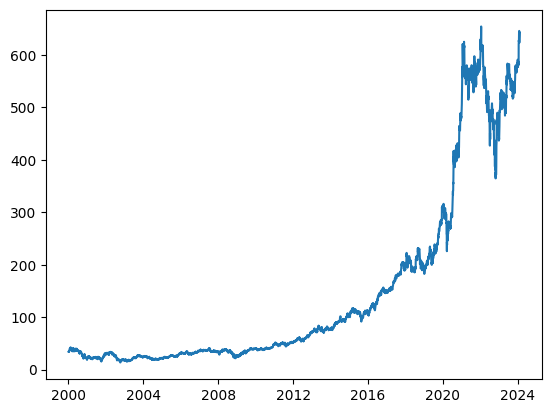

In [22]:
plt.plot(price)

## DATA PREPROCESSING
### 1. 我們先看一下股票的歷史價格有多少筆時序資料，並且進行資料正規化轉換。
我們可以觀察到抓的到的股價共有6009筆。

In [24]:
price.shape

(6009,)

訓練模型的時候我們避免單位影響訓練的成果，收盤股價我們利用```sklearn.preprocessing的MinMaxScaler```將特徵資料轉換-1~1之間。
$$
data\_std = \frac{data-min(data)}{max(data)-min(data)}
$$
$$
data\_scaled = data\_std \times (max-min) + min
$$
其中在我們的轉換，$min=-1, max=1$

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ = scaler.fit_transform(price.values.reshape(-1,1))
price_

array([[-0.93508565],
       [-0.93356657],
       [-0.93295877],
       ...,
       [ 0.90338376],
       [ 0.92834903],
       [ 0.96267628]])

### 2. 我們在進行建模的時候，我們希望用多少歷史資料來預測未來的資料。<br>
比如說我要預測5/17的股價，那我要參考 5/16, 5/15, 5/14,...的股價來預測。 <br>
假設我要用過去**5天**的來預測，所以我們需要把歷史資料切割來建立模型 <br>
假設我有10天的資料，$Day 1, 2,...,10$ (下圖上黑色線)<br>
我們可以把10天的資料拆成 (見下圖)<br>
$Day6  ← Day1,Day2,Day3,Day4,Day5$ → 藍色<br>
$Day7  ← Day2,Day3,Day4,Day5,Day6$ → 橘色<br>
$Day8  ← Day3,Day4,Day5,Day6,Day7$ → 綠色<br>
$Day9  ← Day4,Day5,Day6,Day7,Day8$ → 紅色<br>
$Day10 ← Day5,Day6,Day7,Day8,Day9$ → 紫色<br>

如果用5天來預測，總共有所以10天的資料，這樣會產生5筆用來訓練模型的資料。<br>
總天數假設是$N$，用$p$天來預測，一共會產生$N-p$筆資料。<br>

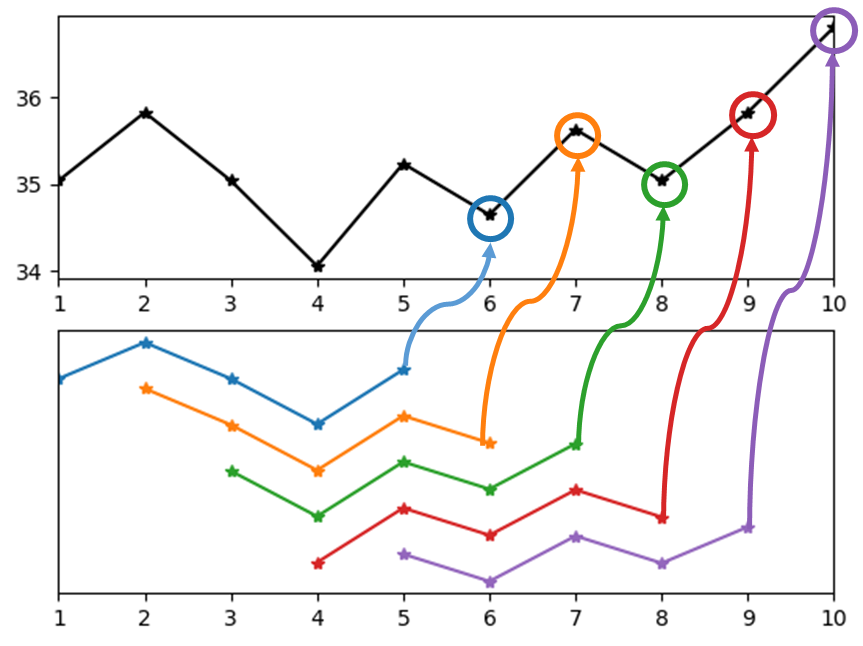

In [38]:
data_raw = np.array(price[0:10])
print(f"history price = {data_raw}")
n_time = len(data_raw)

lookback = 5 # 往後看5天
data = []
targets = []

for index in range(n_time - lookback): 
    data.append(data_raw[index: index + lookback])
    targets.append(data_raw[index + lookback])


for train_data_and_target in zip(data, targets):
    print(train_data_and_target)


history price = [34.37138449 34.85816736 35.05293369 33.59240164 34.56605237 34.85817571
 34.76082199 34.9555961  35.442379   36.70822825]
(array([34.37138449, 34.85816736, 35.05293369, 33.59240164, 34.56605237]), 34.85817570585885)
(array([34.85816736, 35.05293369, 33.59240164, 34.56605237, 34.85817571]), 34.760821990930125)
(array([35.05293369, 33.59240164, 34.56605237, 34.85817571, 34.76082199]), 34.95559609852772)
(array([33.59240164, 34.56605237, 34.85817571, 34.76082199, 34.9555961 ]), 35.442378997802734)
(array([34.56605237, 34.85817571, 34.76082199, 34.9555961 , 35.442379  ]), 36.708228248620614)


In [39]:
price.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6009 entries, 2000-01-04 00:00:00+08:00 to 2024-02-05 00:00:00+08:00
Series name: avg_price
Non-Null Count  Dtype  
--------------  -----  
6009 non-null   float64
dtypes: float64(1)
memory usage: 93.9 KB


### 3.將進行正規化轉換的資料進行時序切割，並且將所有資料分成訓練資料和測試資料
我們利用20天資料來預測未來資料。<br>
將全部資料前半部(80%)作為訓練資料，後面(20%)作為測試資料。<br>
總共有6,009天的資料
總天數假設是$6,009$，用$20$天來預測，一共會產生$6,009-20=5,989$筆資料。<br>
前面(80%)$4,791$筆資料作為訓練資料。<br>
後面(20%)$1,198$筆資料作為測試資料。<br>
>Note: 文件撰寫為2023/2/11，所以同學如果在跑程式碼，資料理論上會更多筆。

In [41]:
from sklearn.model_selection import train_test_split
def split_data(stock, lookback):
    data_raw = np.array(stock)
    n_time = len(data_raw)
    data, targets = [], []
    for index in range(n_time - lookback): 
        data.append(data_raw[index: index + lookback])
        targets.append(data_raw[index + lookback])
    
    data = np.array(data)
    targets = np.array(targets)
    print('總資料量:{}'.format(data.shape))

    #　手動分割訓練集與測試集
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:]
    y_train = targets[:train_set_size]
    
    x_test = data[train_set_size:,:]
    y_test = targets[train_set_size:]
    
    return [x_train, y_train, x_test, y_test]


lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

總資料量:(5989, 20, 1)
x_train.shape =  (4791, 20, 1)
y_train.shape =  (4791, 1)
x_test.shape =  (1198, 20, 1)
y_test.shape =  (1198, 1)


In [42]:
def split_data(stock, lookback):
    data_raw = np.array(stock)
    n_time = len(data_raw)
    data, targets = [], []
    for index in range(n_time - lookback): 
        data.append(data_raw[index: index + lookback])
        targets.append(data_raw[index + lookback])
    
    data = np.array(data)
    targets = np.array(targets)
    print('總資料量:{}'.format(data.shape))

    # 使用train_test_split函數分割訓練集與測試集
    x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, shuffle=True, random_state=42)
    
    return [x_train, y_train, x_test, y_test]


lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

總資料量:(5989, 20, 1)
x_train.shape =  (4791, 20, 1)
y_train.shape =  (4791, 1)
x_test.shape =  (1198, 20, 1)
y_test.shape =  (1198, 1)


## LSTM Model建立

我們這邊很單純的直接利用Pytorch內的```nn.LSTM```建立LSTM模型，後面在加一個fully connection層進行預測。

In [45]:
import torch
import torch.nn as nn

use_cuda = 0
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
print(device)

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()

        '''
        input_dim: 輸入張量的維度 (每天的股價只會有一個值，所以維度為1)
        hidden_dim: 隱藏層的維度 (隱藏神經元數量)
        num_layers: LSTM的層數 (通常設定為1-3層)
        batch_first: 輸入張量的第一維是否為 batch_size (batch_size, seq_len, feature) 
                    ex: (1, 20, 1) => 20天的股價預測第21天的股價，每次訓練一批資料
        '''
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach())) # out = (batch_size, sequence_length, hidden_dim)
        out = self.fc(out[:, -1, :]) # 取最後一個時間點的輸出
        return out

# mymodel = LSTM(input_dim=1, hidden_dim=32, output_dim=1, num_layers=2)
# dummy_input = torch.randn(1, 10, 1)
# out = mymodel(dummy_input)
# torch.onnx.export(mymodel, dummy_input, "lstm_stock.onnx", opset_version=11) 

cpu


## 模型訓練

In [46]:
use_cuda=0 # lstm model 不適用gpu加速
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 500

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)


In [47]:
import time
x_train_ = torch.FloatTensor(x_train)
y_train_ = torch.FloatTensor(y_train)
x_test_ = torch.FloatTensor(x_test)
y_test_ = torch.FloatTensor(y_test)
start_time = time.time()


## 以下為dataloaders的寫法
# datasets_train = torch.utils.data.TensorDataset(x_train_, y_train_)
# datasets_test = torch.utils.data.TensorDataset(x_test_, y_test_)
# dataloader_train = torch.utils.data.DataLoader(datasets_train, batch_size=64, shuffle=True,num_workers=0)
# dataloader_test = torch.utils.data.DataLoader(datasets_test, batch_size=64, shuffle=False,num_workers=0)
# hist = []
# for epoch in range(num_epochs):
#     model.train()
#     for batch_idx, (data, target) in enumerate(dataloader_train):
#         data=data.to(device)
#         target=target.to(device)
#         y_train_pred = model(data)
#         loss = criterion(y_train_pred, target)
#         hist.append(loss.item())
#         optimiser.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     if epoch%10==0:
#         model.eval()
#         loss_record=0
#         for _, (data, target) in enumerate(dataloader_test):
#             data=data.to(device)
#             target=target.to(device)
#             y_pred = model(data)
#             loss = criterion(y_pred, target)
#             loss_record+=loss.item()
#         print("Epoch ", epoch, "MSE: ", loss_record/len(dataloader_test))
#     scheduler.step()


hist=[]    
for t in range(num_epochs):
    y_train_pred = model(x_train_)
    loss = criterion(y_train_pred, y_train_)
    hist.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%50==0:
        print("Epoch ", t, "MSE: ", loss.item())
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  1.0265158414840698
Epoch  50 MSE:  0.8695290088653564
Epoch  100 MSE:  0.6477776169776917
Epoch  150 MSE:  0.21187613904476166
Epoch  200 MSE:  0.02266591414809227
Epoch  250 MSE:  0.02048865705728531
Epoch  300 MSE:  0.019279759377241135
Epoch  350 MSE:  0.017867568880319595
Epoch  400 MSE:  0.016229648143053055
Epoch  450 MSE:  0.014352681115269661
Training time: 26.983864307403564


### 訓練資料的loss變化，和實際預測的變化

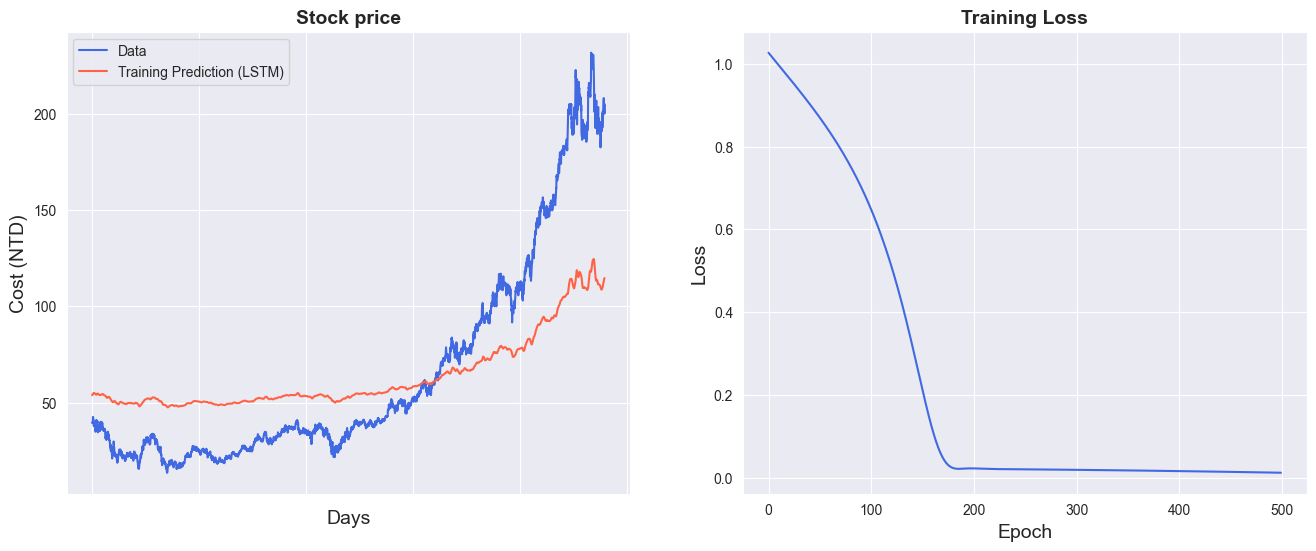

In [48]:
import seaborn as sns
sns.set_style("darkgrid")    

y_train_pred = model(x_train_)
y_train_pred = y_train_pred.detach().cpu().numpy()
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred))
original = pd.DataFrame(scaler.inverse_transform(y_train_.detach().numpy()))

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)


### 測試資料預測的結果

[Text(-200.0, 0, ''),
 Text(0.0, 0, ''),
 Text(200.0, 0, ''),
 Text(400.0, 0, ''),
 Text(600.0, 0, ''),
 Text(800.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1200.0, 0, ''),
 Text(1400.0, 0, '')]

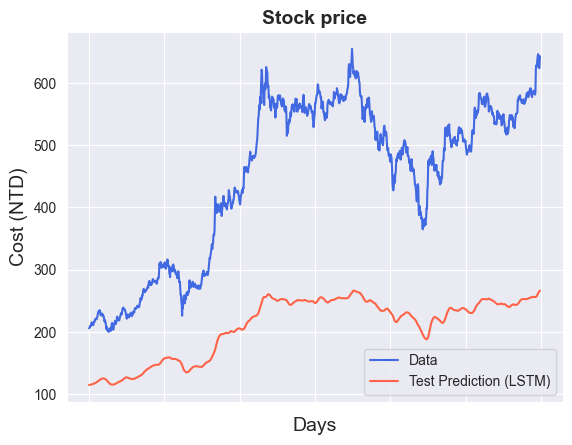

In [50]:
model.eval()
y_test_pred = model(x_test_)
predict = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy())) # 因為有做標準化，所以要轉回原本的數值
original = pd.DataFrame(scaler.inverse_transform(y_test_.detach().numpy()))# 因為有做標準化，所以要轉回原本的數值

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Test Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
ax.set_xticklabels('', size=10)


## 所有的code寫在一起，預測股價換成聯發科(2454)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import numpy as np
import time
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers    
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

def split_data(stock, lookback):
    data_raw = np.array(stock)
    n_time = len(data_raw)
    data, targets = [], []
    for index in range(n_time - lookback): 
        data.append(   data_raw[index: index + lookback])
        targets.append(data_raw[index + lookback])
    
    data = np.array(data)
    targets = np.array(targets)
    print('總資料量:{}'.format(data.shape))
    test_set_size = int(np.round(0.5*data.shape[0]));  # split data into half: training 50%, testing 50%
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:]
    y_train = targets[:train_set_size]
    
    x_test = data[train_set_size:,:]
    y_test = targets[train_set_size:]
    
    return [x_train, y_train, x_test, y_test]

# 股價換成長榮(航運)(2603)
df = yf.Ticker("2603.TW")
price = df.history(period="max").Close
price = price[-600:-1] # 取最近600天的股價
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ = scaler.fit_transform(price.values.reshape(-1,1))
lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 500

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
x_train_ = torch.FloatTensor(x_train)
y_train_ = torch.FloatTensor(y_train)
x_test_ = torch.FloatTensor(x_test)
y_test_ = torch.FloatTensor(y_test)

hist = np.zeros(num_epochs)
start_time = time.time()
model.train()
for t in range(num_epochs):
    y_train_pred = model(x_train_)
    loss = criterion(y_train_pred, y_train_)
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    if t%50==0:
        print("Epoch ", t, "MSE: ", loss.item())
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

總資料量:(589, 10, 1)
x_train.shape =  (295, 10, 1)
y_train.shape =  (295, 1)
x_test.shape =  (294, 10, 1)
y_test.shape =  (294, 1)
Epoch  0 MSE:  0.2605488896369934
Epoch  50 MSE:  0.03296728432178497
Epoch  100 MSE:  0.025901222601532936
Epoch  150 MSE:  0.01851234771311283
Epoch  200 MSE:  0.012198921293020248
Epoch  250 MSE:  0.010302980430424213
Epoch  300 MSE:  0.008834395557641983
Epoch  350 MSE:  0.007883084006607533
Epoch  400 MSE:  0.007244628854095936
Epoch  450 MSE:  0.006962677463889122
Training time: 3.9910521507263184


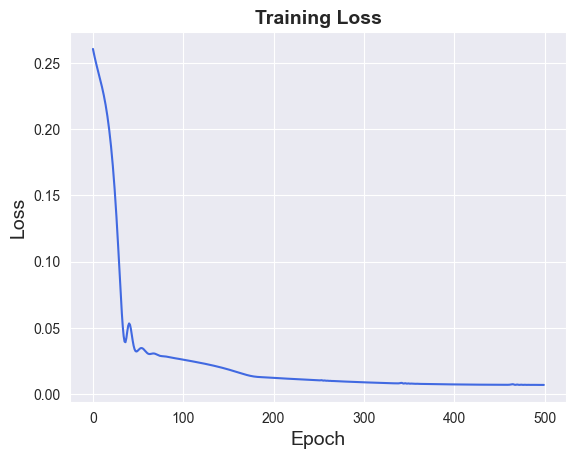

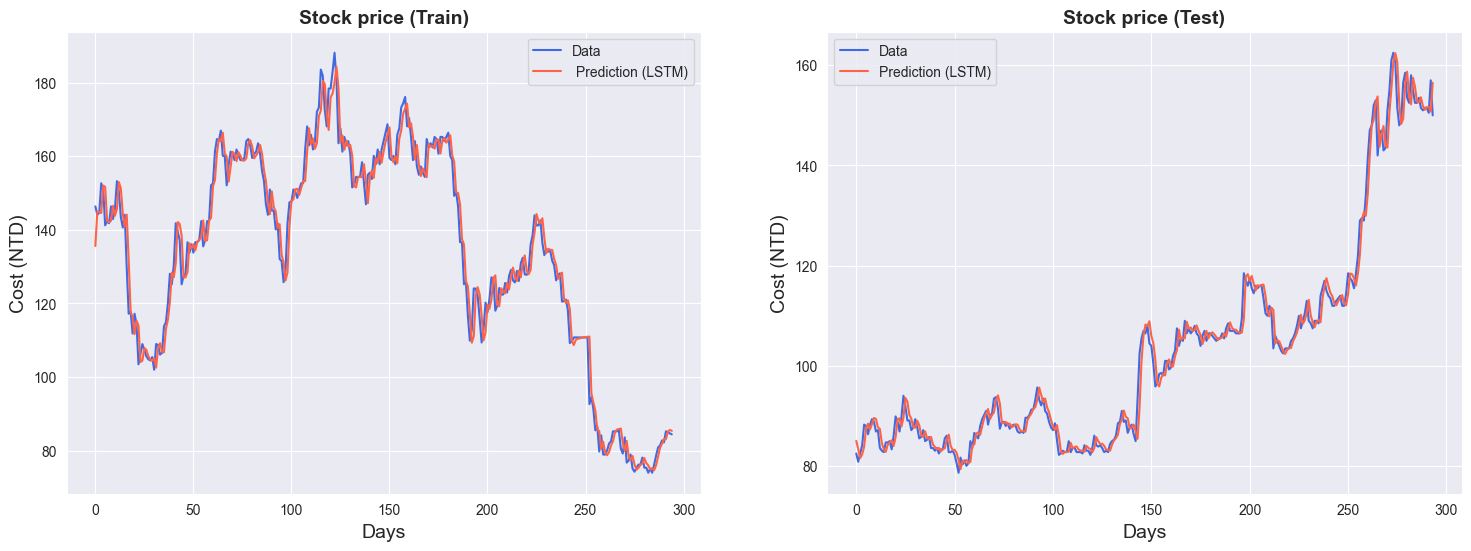

In [60]:
import seaborn as sns

sns.set_style("darkgrid")    
fig = plt.figure()
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
model.eval()
y_train_pred = model(x_train_)
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_.detach().numpy()))
plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label=" Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Train)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
# plt.ylim([500,950])
# ax.set_xticklabels('', size=10)

y_test_pred = model(x_test_)
predict = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_test_.detach().numpy()))
plt.subplot(1, 2, 2)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Test)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)
# plt.ylim([500,950])

# ax.set_xticklabels('', size=10)
fig.set_figheight(6)
fig.set_figwidth(18)



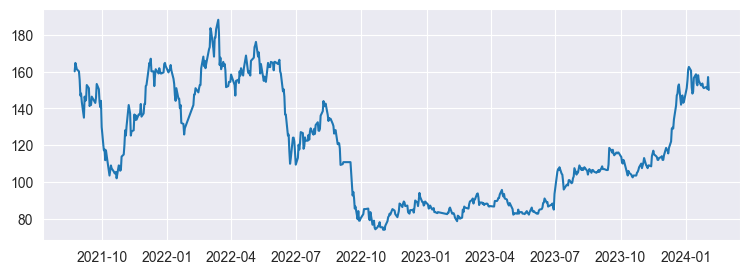

In [61]:
fig = plt.figure()
plt.plot(price)
fig.set_figheight(3)
fig.set_figwidth(9)

In [67]:
price.sort_index(ascending=False).head(20)

Date
2024-02-02 00:00:00+08:00    150.0
2024-02-01 00:00:00+08:00    157.0
2024-01-31 00:00:00+08:00    150.5
2024-01-30 00:00:00+08:00    151.5
2024-01-29 00:00:00+08:00    151.5
2024-01-26 00:00:00+08:00    151.0
2024-01-25 00:00:00+08:00    151.5
2024-01-24 00:00:00+08:00    153.5
2024-01-23 00:00:00+08:00    152.5
2024-01-22 00:00:00+08:00    152.5
2024-01-19 00:00:00+08:00    155.0
2024-01-18 00:00:00+08:00    158.0
2024-01-17 00:00:00+08:00    152.5
2024-01-16 00:00:00+08:00    153.5
2024-01-15 00:00:00+08:00    158.5
2024-01-12 00:00:00+08:00    156.5
2024-01-11 00:00:00+08:00    149.0
2024-01-10 00:00:00+08:00    148.0
2024-01-09 00:00:00+08:00    151.5
2024-01-08 00:00:00+08:00    160.5
Name: Close, dtype: float64

### 手動測試 任意區間的股價

In [68]:
## 4/25-5/9 預測 5/10
price_manual = np.array([[650,649,662,665,671,680,668,675,675,677]])
price_manual_ = scaler.transform(price_manual.reshape(-1,1))
price_manual_ = torch.FloatTensor(price_manual_)
price_manual_ = price_manual_.unsqueeze(0)
y_test_pred = model(price_manual_)
predict = scaler.inverse_transform(y_test_pred.detach().numpy())
print(predict)

[[300.3553]]


In [69]:
## 4/26-5/10 預測 5/11
price_manual = np.array([[649,662,665,671,680,668,675,675,677,668]])
price_manual_ = scaler.transform(price_manual.reshape(-1,1))
price_manual_ = torch.FloatTensor(price_manual_)
price_manual_ = price_manual_.unsqueeze(0)
y_test_pred = model(price_manual_)
predict = scaler.inverse_transform(y_test_pred.detach().numpy())
print(predict)

[[300.37436]]


In [82]:
price

Date
2021-08-24 00:00:00+08:00    160.093674
2021-08-25 00:00:00+08:00    164.667770
2021-08-26 00:00:00+08:00    162.952484
2021-08-27 00:00:00+08:00    161.237198
2021-08-30 00:00:00+08:00    160.093674
                                ...    
2024-01-29 00:00:00+08:00    151.500000
2024-01-30 00:00:00+08:00    151.500000
2024-01-31 00:00:00+08:00    150.500000
2024-02-01 00:00:00+08:00    157.000000
2024-02-02 00:00:00+08:00    150.000000
Name: Close, Length: 599, dtype: float64

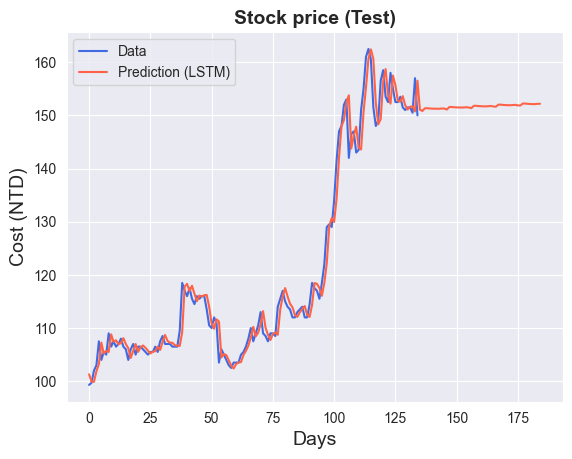

In [81]:
# 取最近145天的股價
x=price[-145:]
real_targets=[]
predicts=[]

# 訓練過去135組資料，每組資料有10天的股價，預測第11天的股價
for i in range(135):
    price_manual = np.array(x[i:i+10]) 
    real_targets.append(np.array(x.iloc[i+10]))
    price_manual_ = scaler.transform(price_manual.reshape(-1,1))
    price_manual_ = torch.FloatTensor(price_manual_)
    price_manual_ = price_manual_.unsqueeze(0)
    y_test_pred = model(price_manual_)
    predict = scaler.inverse_transform(y_test_pred.detach().numpy())
    predicts.append(predict[0,:])
    
st = 135
# 預測未來50天
for t in range(50): 
    price_manual=[]
    c=0
    for j in range(10):
        try: 
            price_manual.append(x.iloc[st+j])
        except:
            price_manual.append(predicts[-1-c][0])
            c+=1
    st+=1
    price_manual = np.array(price_manual) 
    price_manual_ = scaler.transform(price_manual.reshape(-1,1))
    price_manual_ = torch.FloatTensor(price_manual_)
    price_manual_ = price_manual_.unsqueeze(0)
    y_test_pred = model(price_manual_)
    predict = scaler.inverse_transform(y_test_pred.detach().numpy())
    predicts.append(predict[0,:])
    

predict = pd.DataFrame(predicts)
original = pd.DataFrame(real_targets)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Prediction (LSTM)", color='tomato')
ax.set_title('Stock price (Test)', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (NTD)", size = 14)


fig.set_figheight(6)
fig.set_figwidth(18)


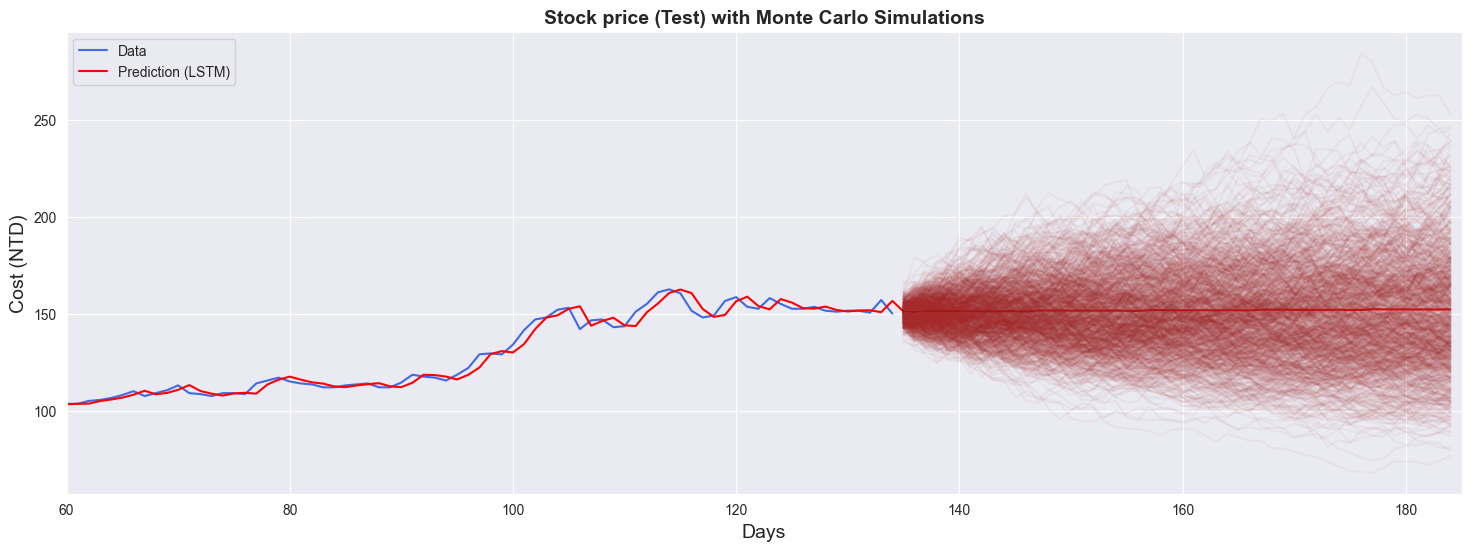

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 股價數據
df = pd.DataFrame(price)
df.columns = ['price']

# 計算對數回報率
log_returns = np.log(df['price'] / df['price'].shift(1))

# 估計漂移（mu）
mu = log_returns.mean()

# 估計波動性（sigma）
sigma = log_returns.std()

# 使用最後一個已知股價進行模擬
last_price = df['price'].iloc[-1]

# 設定模擬參數
days = 50  # 預測未來50天
simulations = 1000  # 進行1000次模擬

# 初始化價格路徑數組
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = last_price

# 生成價格路徑
for t in range(1, days + 1):
    shock = np.random.normal(mu, sigma, simulations)
    price_paths[t] = price_paths[t - 1] * np.exp(shock)

# 使用您的預測模型獲得的預測結果
predict = pd.DataFrame(predicts)
original = pd.DataFrame(real_targets)

# 繪製原始數據和預測數據
plt.figure(figsize=(18, 6))
ax = sns.lineplot(x=original.index, y=original[0], label="Data", color='royalblue')
ax = sns.lineplot(x=predict.index, y=predict[0], label="Prediction (LSTM)", color='red')

# 繪製蒙地卡羅模擬的結果
for i in range(simulations):
    plt.plot(range(135, 135 + days), price_paths[1:, i], color='brown', alpha=0.05)

ax.set_title('Stock price (Test) with Monte Carlo Simulations', size=14, fontweight='bold')
ax.set_xlabel("Days", size=14)
ax.set_ylabel("Cost (NTD)", size=14)
ax.set_xlim(60, 185)
plt.show()
